In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import pyro
import pyro.infer
import pyro.optim
import pyro.distributions as dist

from pyro import poutine
from pyro.nn import PyroSample
from pyro.infer import MCMC, NUTS, EmpiricalMarginal

pyro.set_rng_seed(101)

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
mu_0 = 500
sigma_0 = 1.5
n = 15

In [10]:
y = np.random.normal(loc=mu_0, scale=sigma_0, size=[n,])

def model():
    mu = pyro.param("mu", dist.Normal(loc=1, scale=2))
    sigma = pyro.param("sigma", dist.InverseGamma(concentration=4, rate=2))
    
    return pyro.sample("model", dist.Normal(loc=mu, scale=sigma))

def conditioned_model(model):
    return poutine.condition(model, data={"obs": y})()

nuts_kernel = NUTS(model=conditioned_model)
mcmc = MCMC(kernel=nuts_kernel,
            num_samples=1000,
            num_chains=1, 
            warmup_steps=1000)
mcmc.run(model)

Sample: 100%|██████████| 2000/2000 [00:05, 342.10it/s, step size=8.90e-01, acc. prob=0.940]


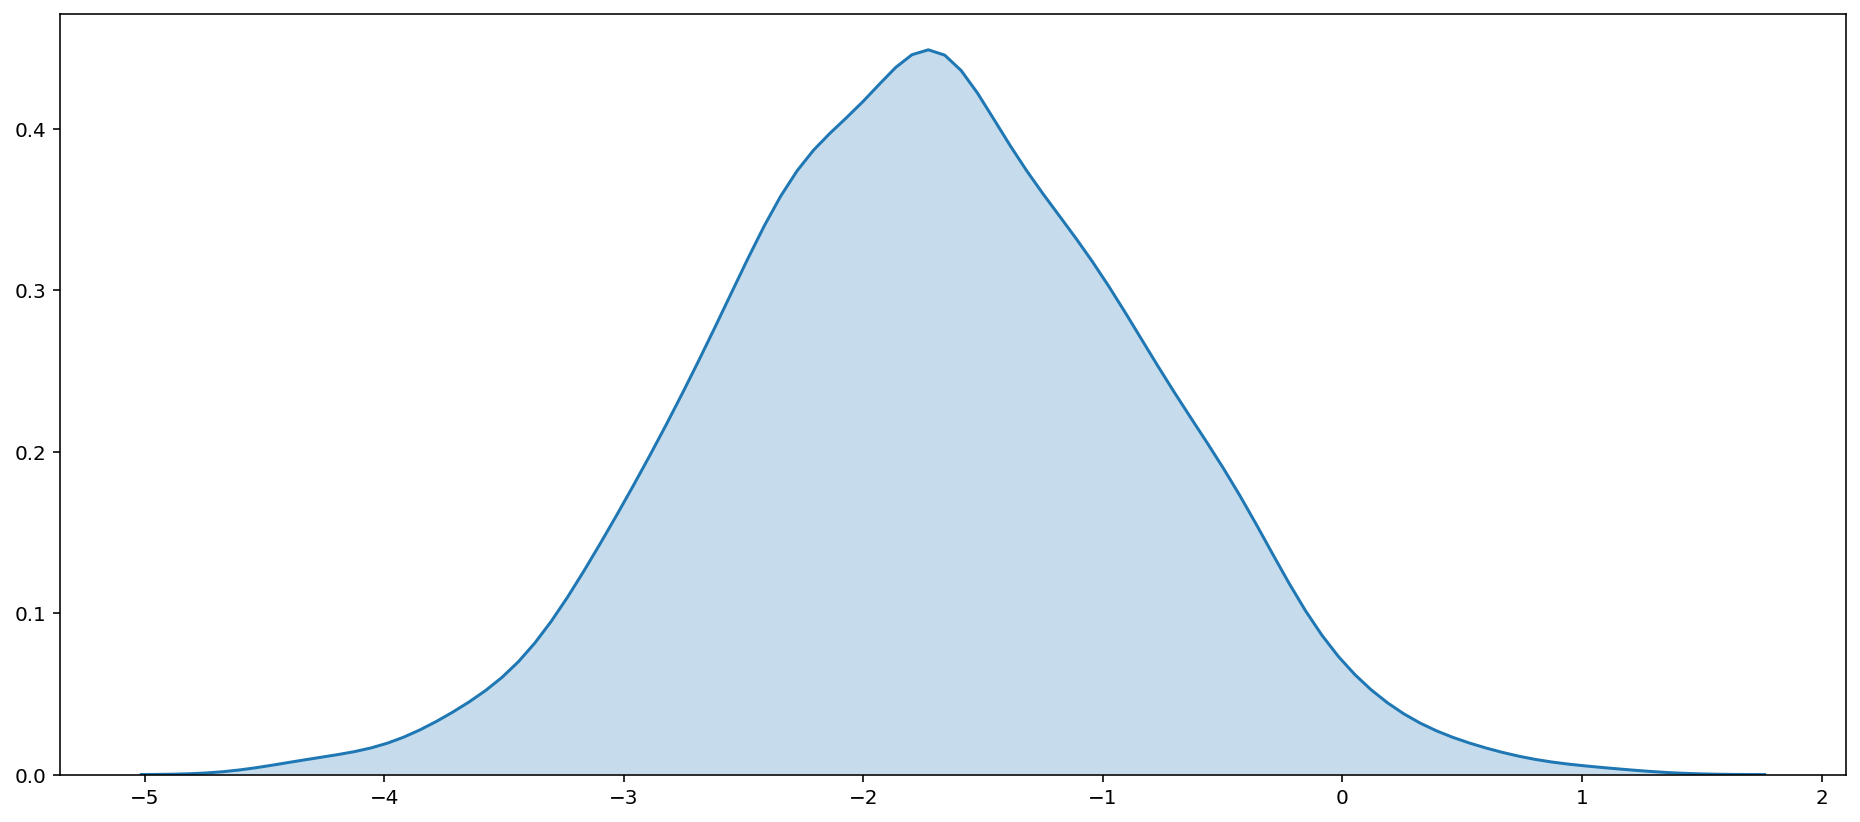

In [11]:
samples = mcmc.get_samples()["model"].numpy()

fig = plt.figure(figsize=(16, 7))
sns.kdeplot(samples, shade=True)

In [12]:
np.mean(samples)

-1.7287389